In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import Current_Process_Pallet_TFC_Simulation as CPS


In [2]:
predict_vol = 8300
variance = 0.1
### Labor Allocations ###
night_total_tm = 30

night_tm_pit_unload = 2
night_tm_pit_induct = 6 # must be fewer than 8 or whatever the number of induct spaces is
night_tm_nonpit_split = 1  # must be 1
night_tm_nonpit_NC = 7
night_tm_nonpit_buffer = 14

#NIGHTS TLMD SORT ALLOCATION
night_tm_TLMD_induct = 6  #must be 6 or fewer
night_tm_TLMD_induct_stage = 2
night_tm_TLMD_picker = 4  #Must be 4
night_tm_TLMD_sort = 18

#NIGHTS TLMD STAGE ALLOCATION
night_tm_TLMD_stage = 30
day_total_tm = 18

#DAYS INBOUND INDUCT ALLOCATION
day_tm_pit_unload = 1 
day_tm_pit_induct = 4 # must be fewer than 8 or whatever the number of induct spaces is
day_tm_nonpit_split = 1   # must be 1
day_tm_nonpit_NC = 2
day_tm_nonpit_buffer = 8

#NIGHTS TLMD SORT ALLOCATION
day_tm_TLMD_induct = 4 # must be 6 or fewer
day_tm_TLMD_induct_stage = 1
day_tm_TLMD_picker = 4  #Must be 4
day_tm_TLMD_sort = 9


#DAYSS TLMD STAGE ALLOCATION
day_tm_TLMD_stage = 16



USPS_Fluid_Status = False
UPSN_Fluid_Status = False
FDEG_Fluid_Status = False
FDE_Fluid_Status = False

var_05 = False
var_10 = False
var_15 = False
var_20 = False
var_25 = False
var_30 = False
var_35 = False
var_40 = False

iterations = 1


Trial: 0


c:\Users\fenst\Documents\Python\Practice\Tuned DES\Current_pallet_TFC\sim_generator_TFC_Fluid.py:39: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  total_tlmd_volume = int(df_carrier_breakdown.loc[df_carrier_breakdown['Organization'] == 'TLMD', 'Packages']) + TFC_vol


Total TLMD volume: 5553
TFC volume: 2843
linehaul tlmd volume: 2710
[{'Truck Number': 1, 'pallets': [{'TLMD': 25, 'FDEG': 3, 'UPSN': 9, 'USPS': 12, 'FDE': 0}, {'TLMD': 24, 'FDEG': 4, 'UPSN': 9, 'USPS': 17, 'FDE': 0}, {'TLMD': 18, 'FDEG': 2, 'UPSN': 8, 'USPS': 14, 'FDE': 0}, {'TLMD': 26, 'FDEG': 3, 'UPSN': 7, 'USPS': 15, 'FDE': 0}]}, {'Truck Number': 2, 'pallets': [{'TLMD': 42, 'FDEG': 6, 'UPSN': 11, 'USPS': 9, 'FDE': 1}, {'TLMD': 29, 'FDEG': 4, 'UPSN': 14, 'USPS': 16, 'FDE': 0}, {'TLMD': 32, 'FDEG': 4, 'UPSN': 6, 'USPS': 20, 'FDE': 0}, {'TLMD': 30, 'FDEG': 4, 'UPSN': 9, 'USPS': 10, 'FDE': 1}, {'TLMD': 24, 'FDEG': 4, 'UPSN': 9, 'USPS': 11, 'FDE': 0}, {'TLMD': 22, 'FDEG': 4, 'UPSN': 11, 'USPS': 17, 'FDE': 1}, {'TLMD': 29, 'FDEG': 4, 'UPSN': 9, 'USPS': 13, 'FDE': 0}, {'TLMD': 31, 'FDEG': 2, 'UPSN': 10, 'USPS': 9, 'FDE': 0}, {'TLMD': 28, 'FDEG': 8, 'UPSN': 13, 'USPS': 12, 'FDE': 0}, {'TLMD': 26, 'FDEG': 5, 'UPSN': 12, 'USPS': 16, 'FDE': 0}, {'TLMD': 33, 'FDEG': 10, 'UPSN': 13, 'USPS': 18, 

c:\Users\fenst\Documents\Python\Practice\Tuned DES\Current_pallet_TFC\Current_Process_Pallet_TFC_Simulation.py:341: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


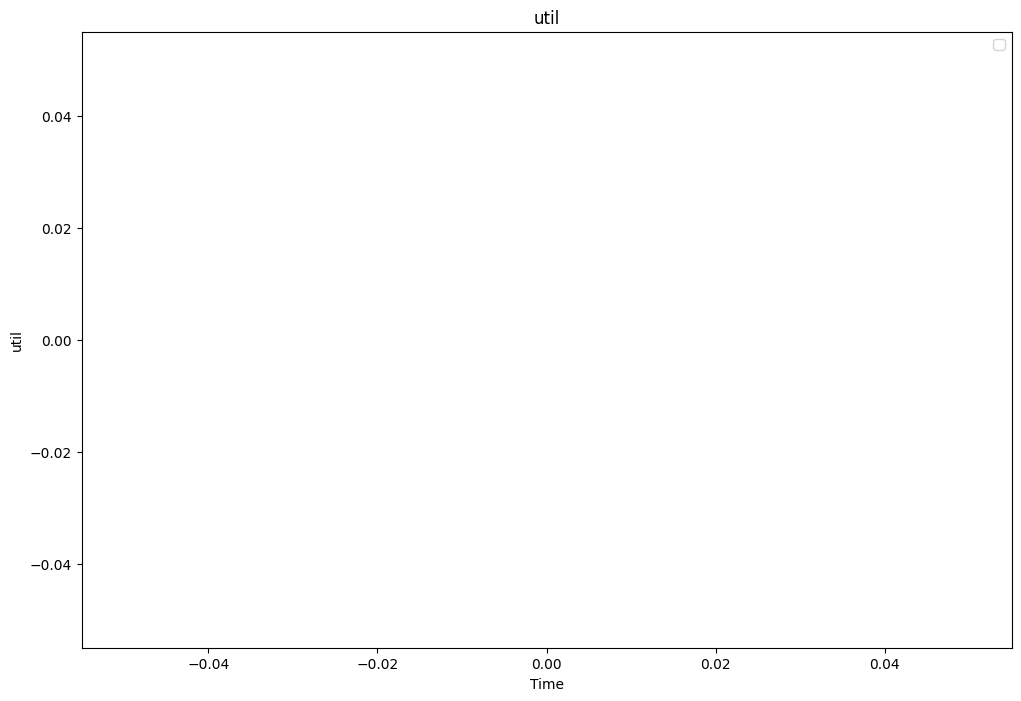

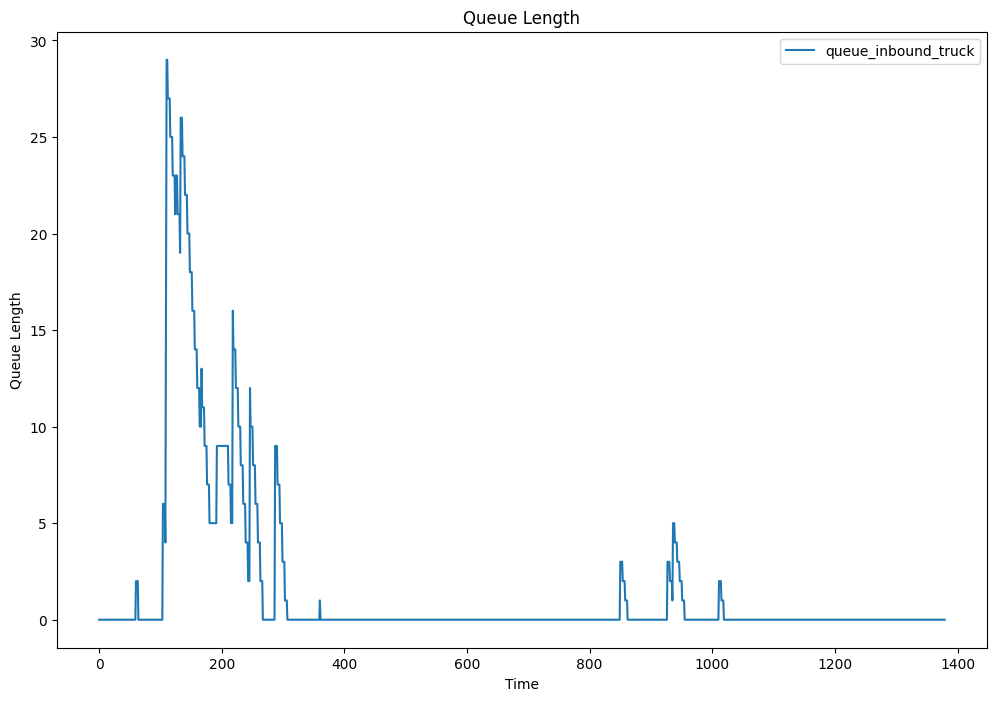

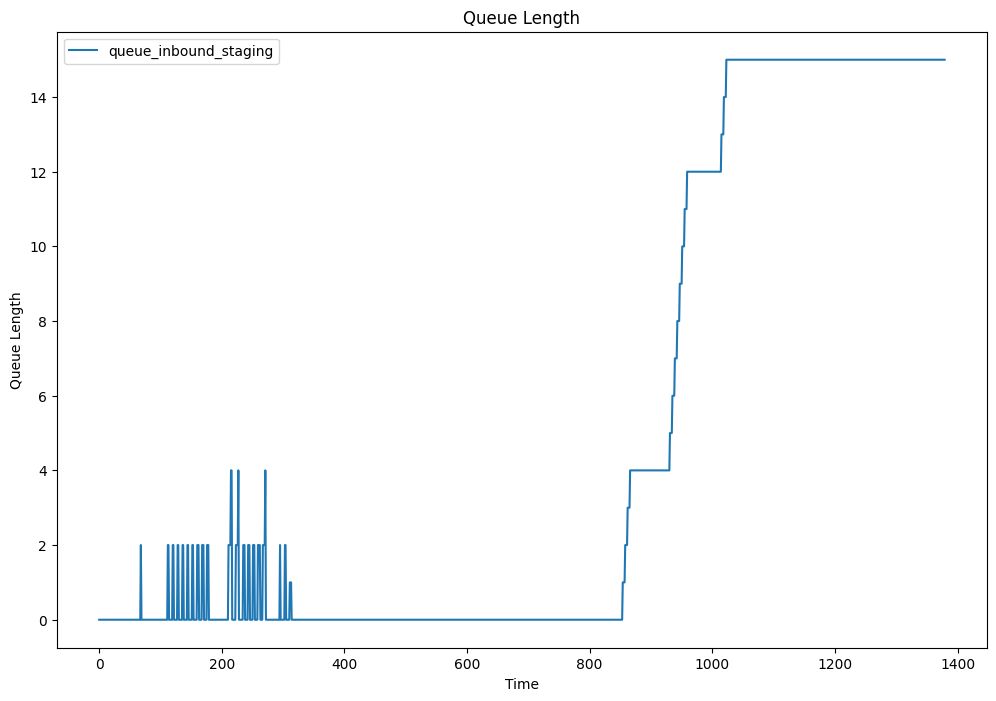

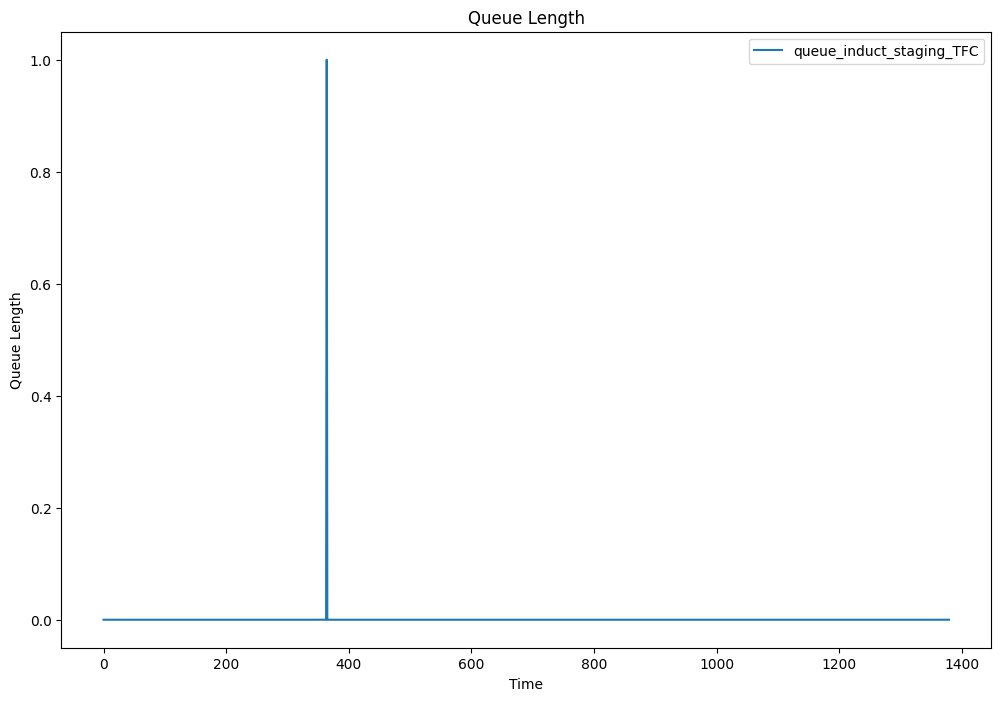

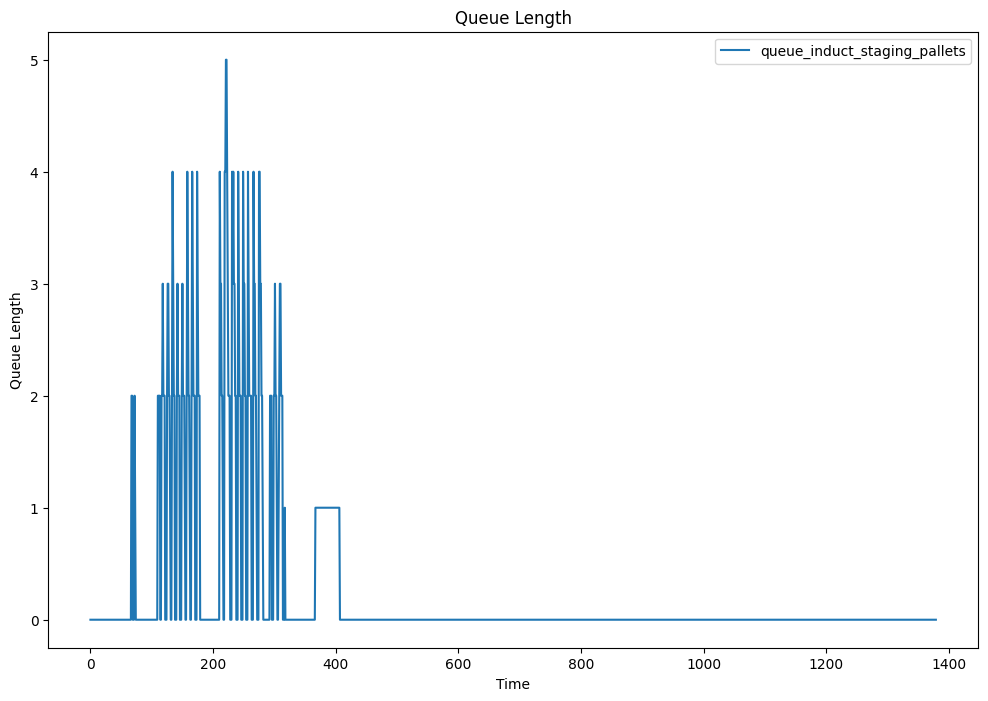

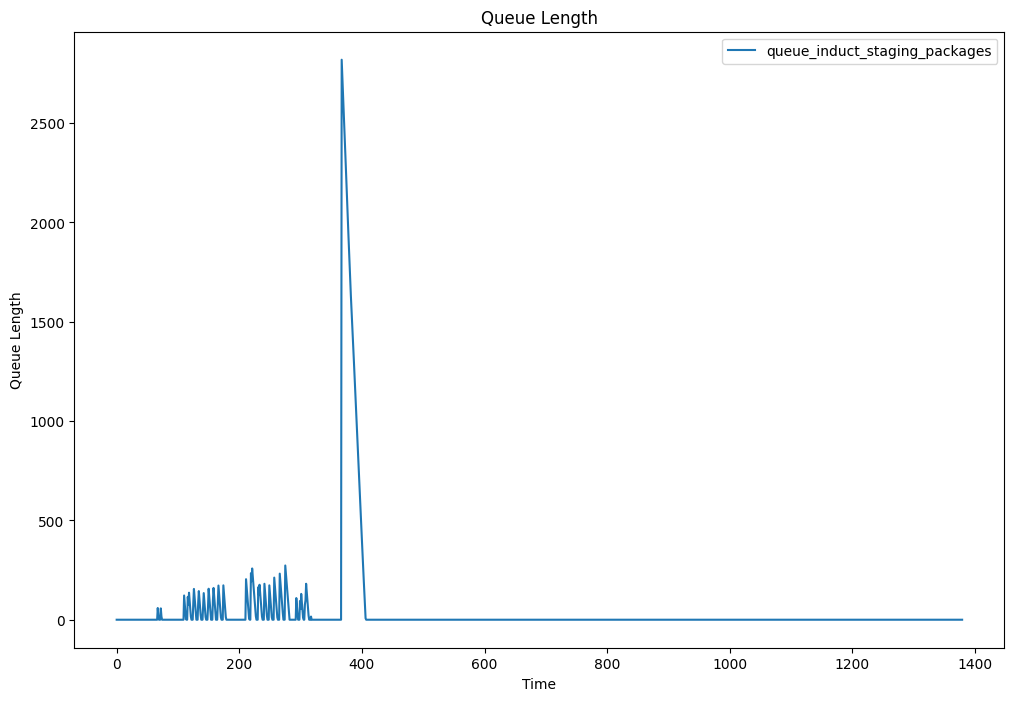

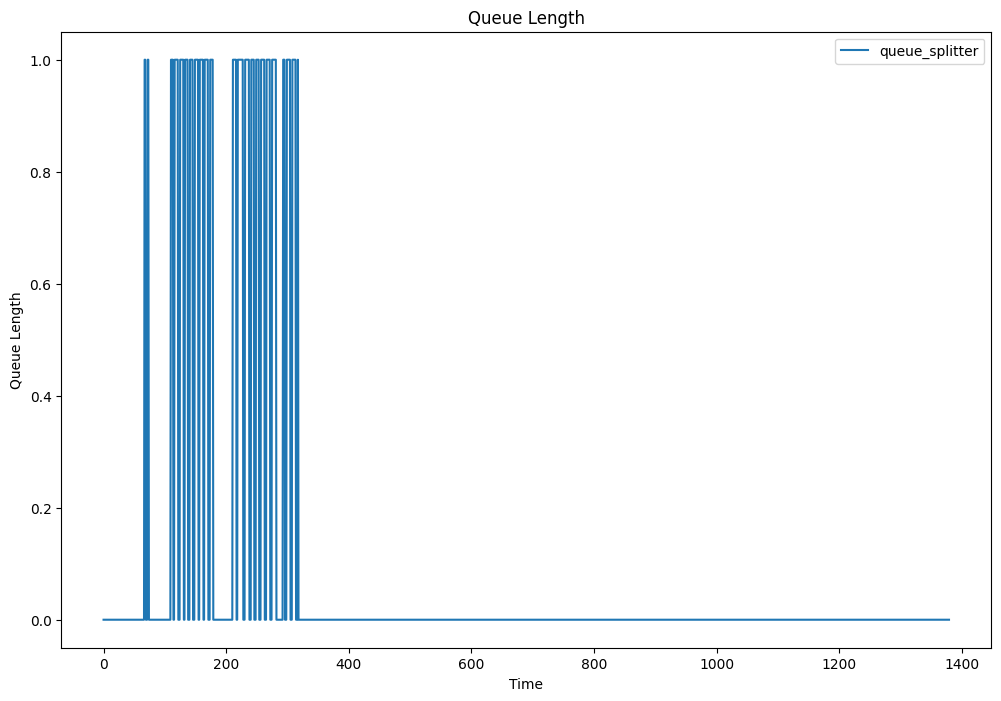

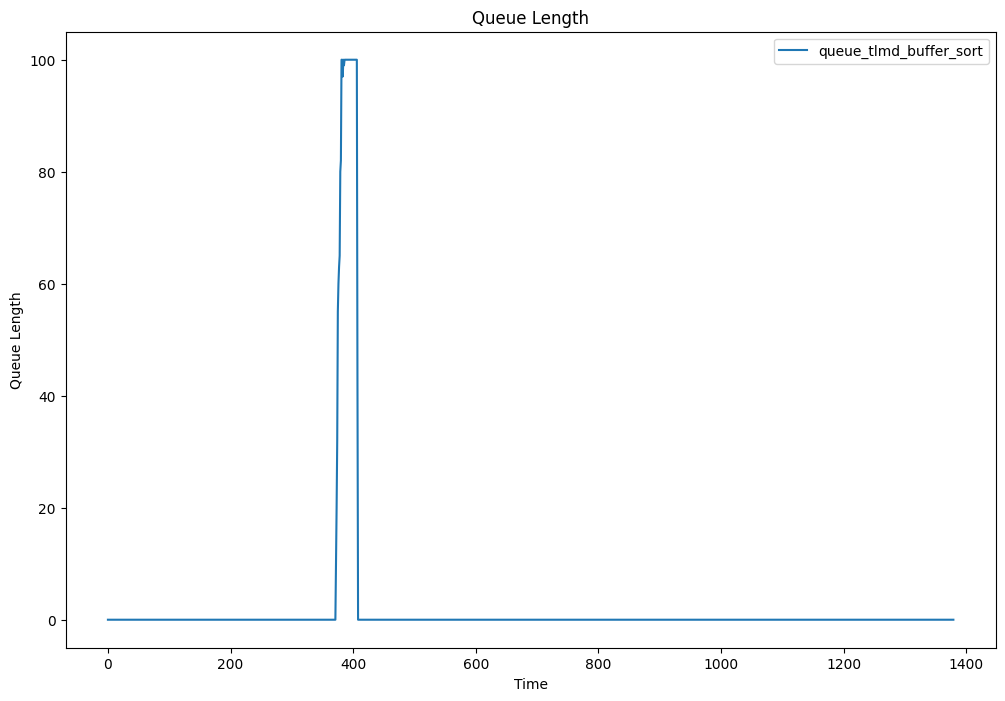

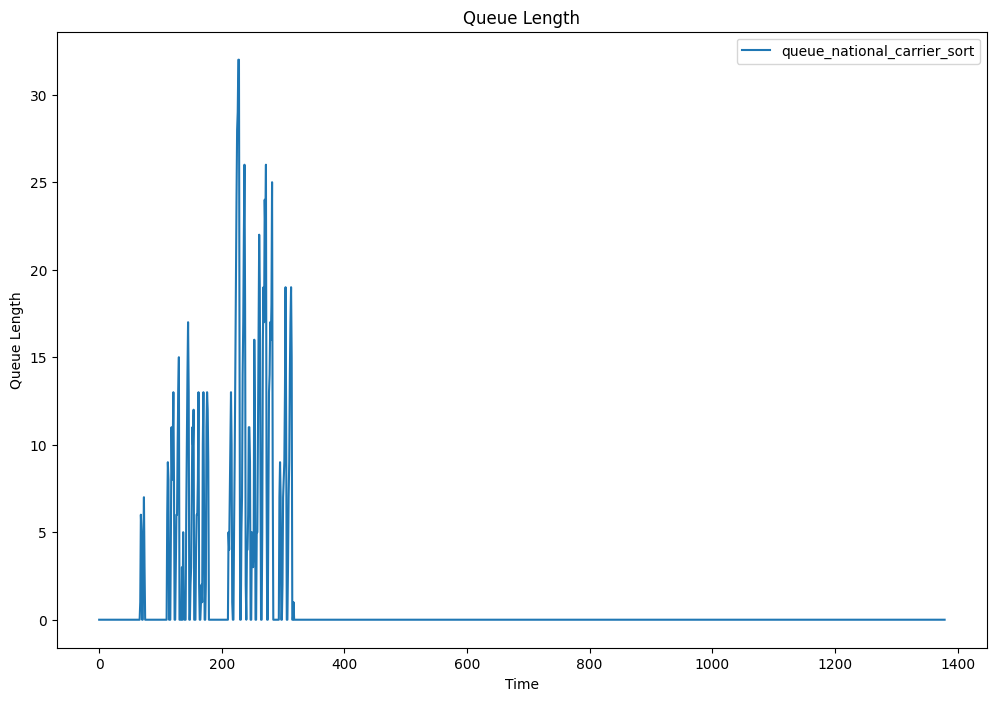

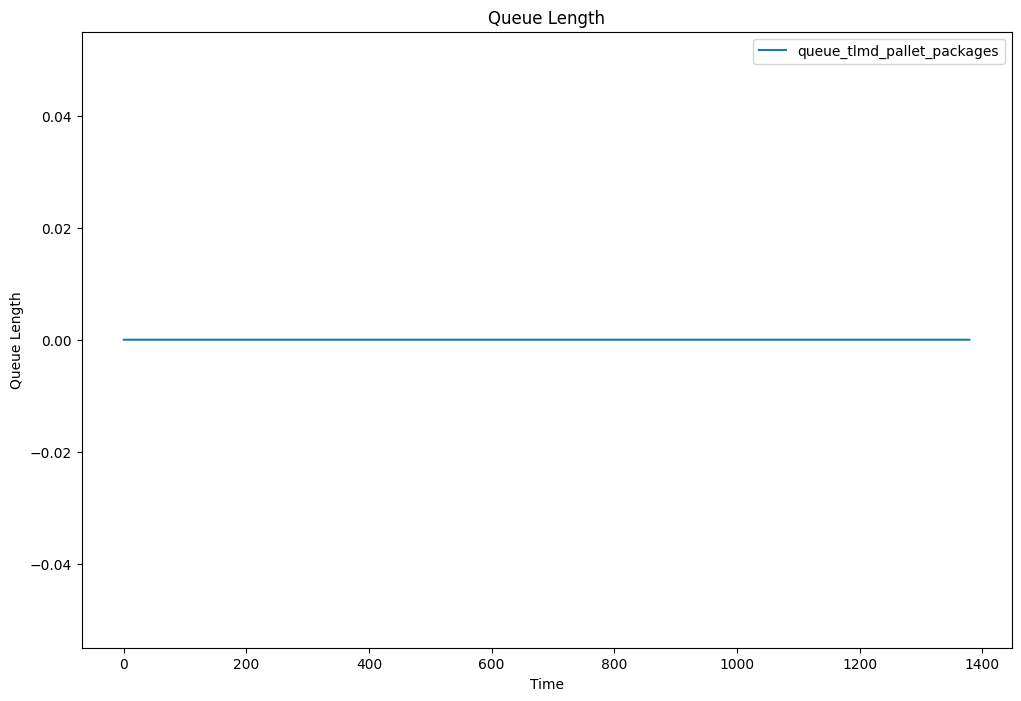

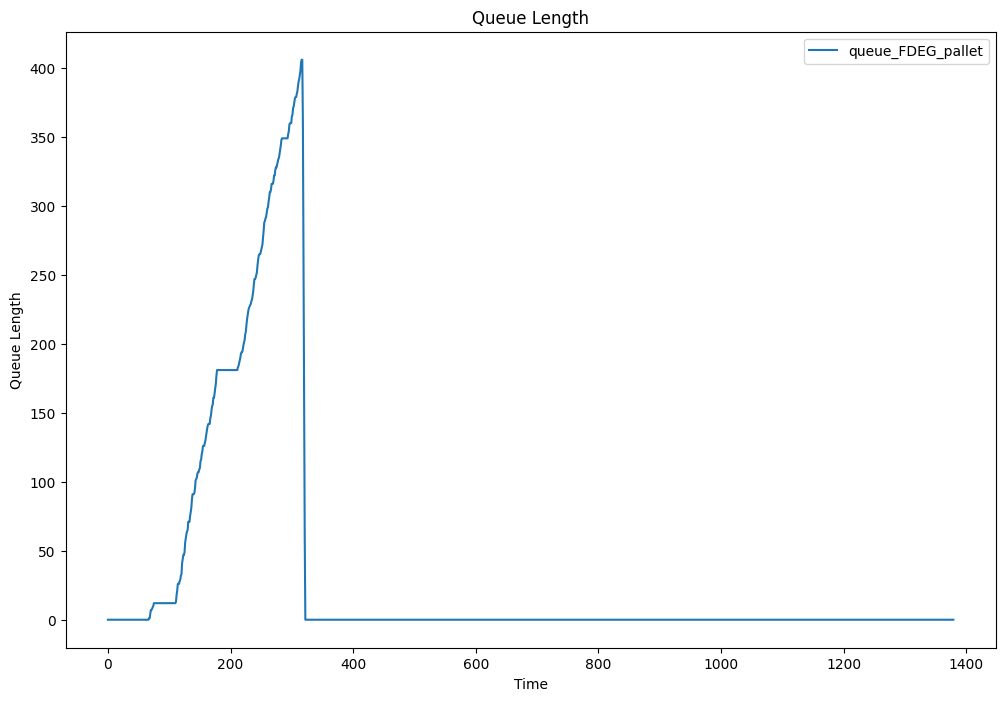

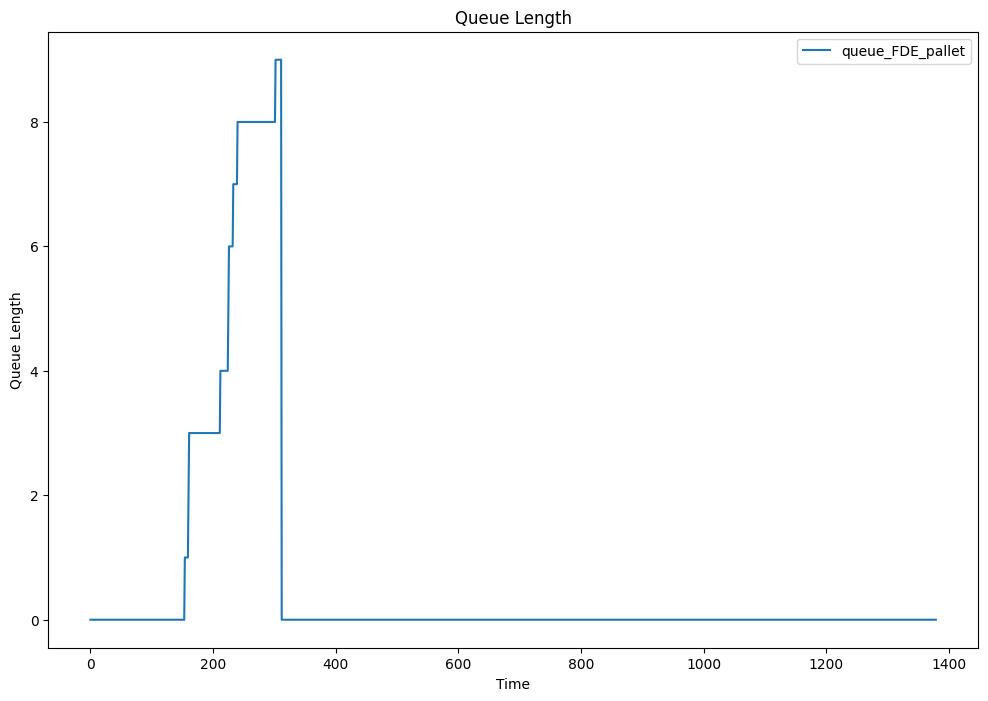

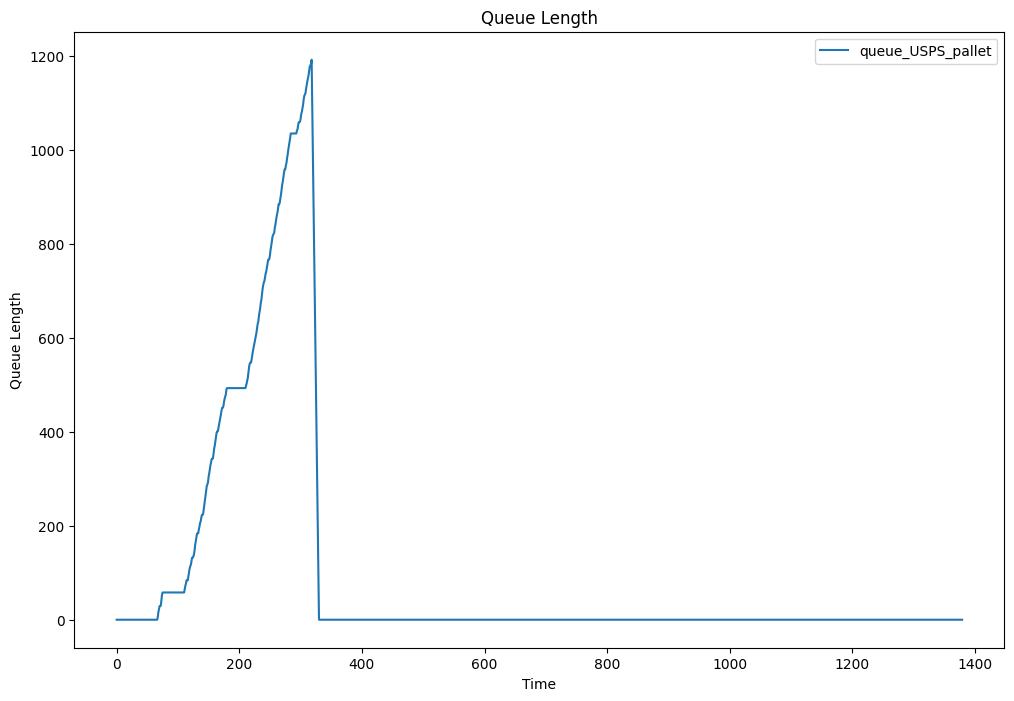

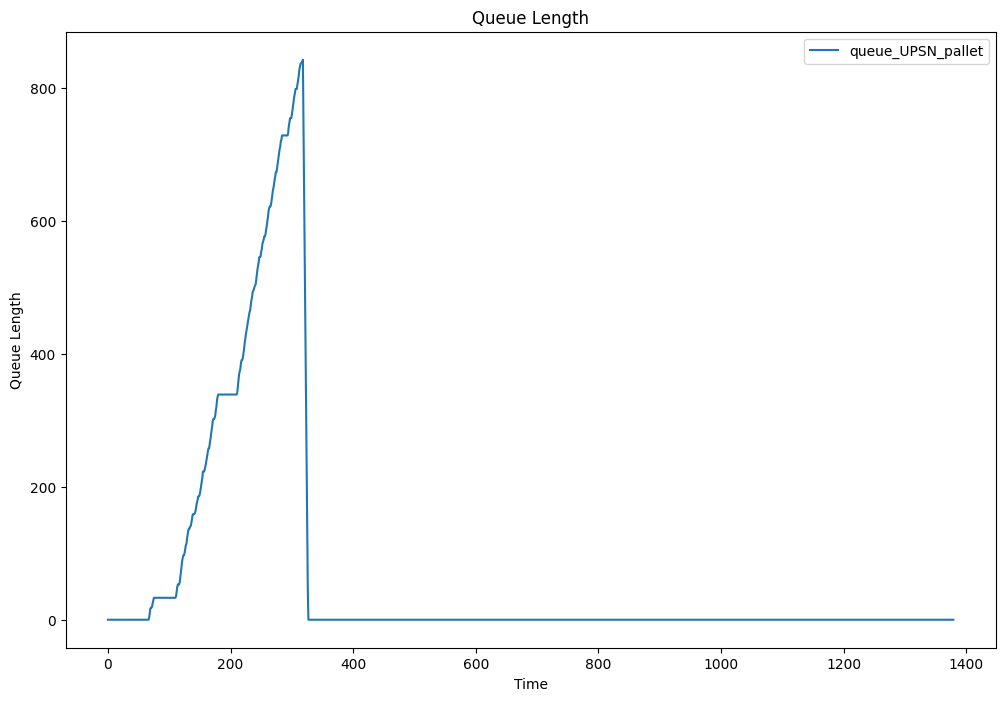

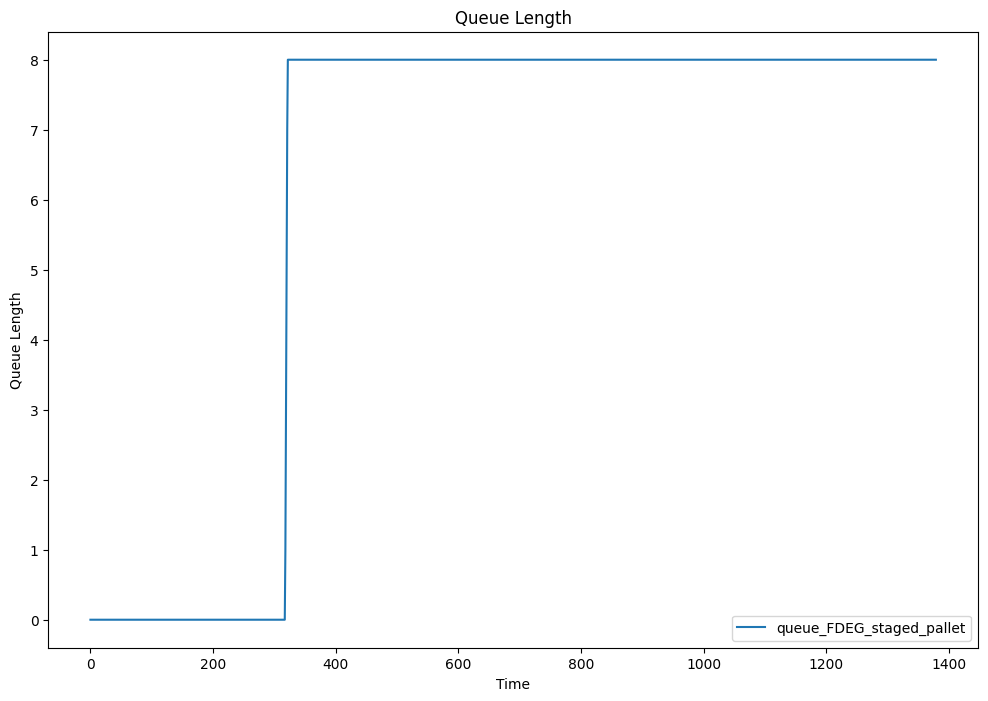

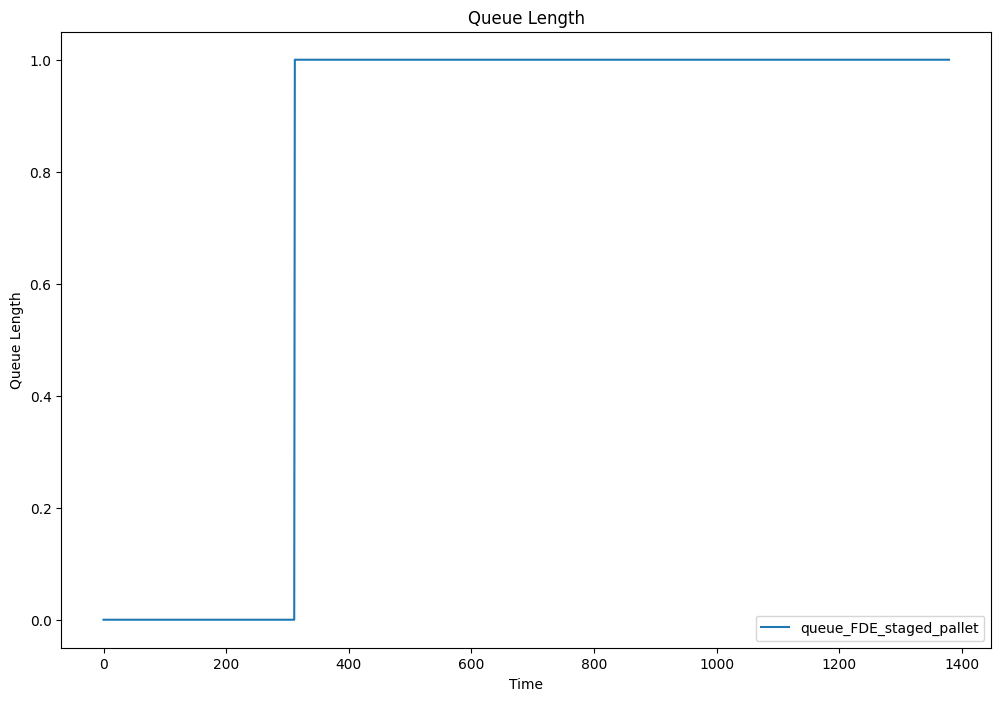

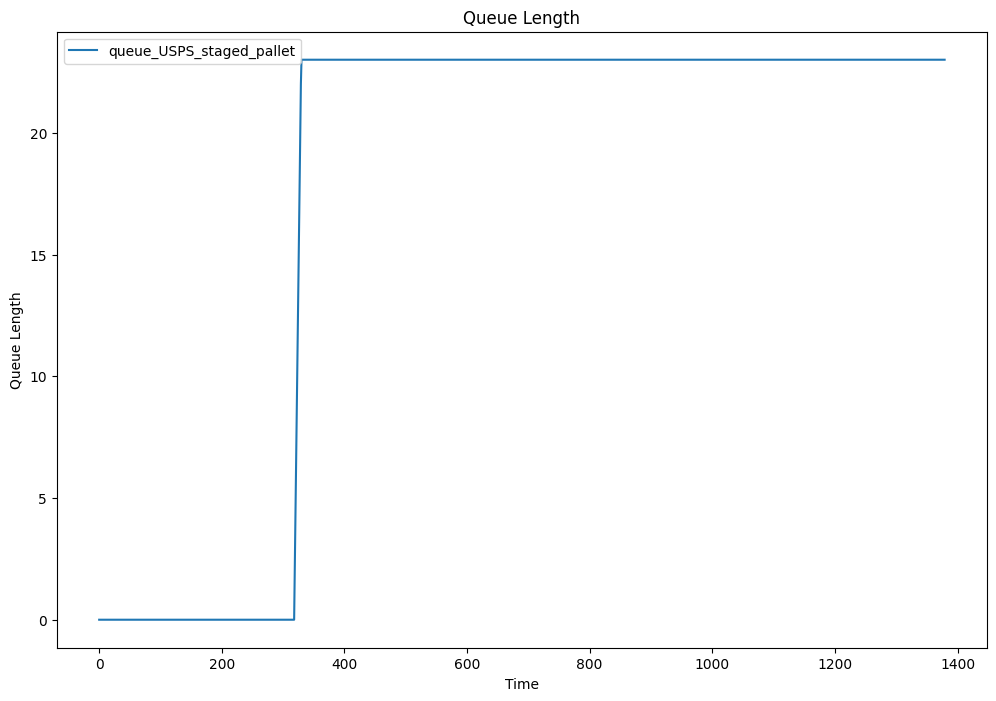

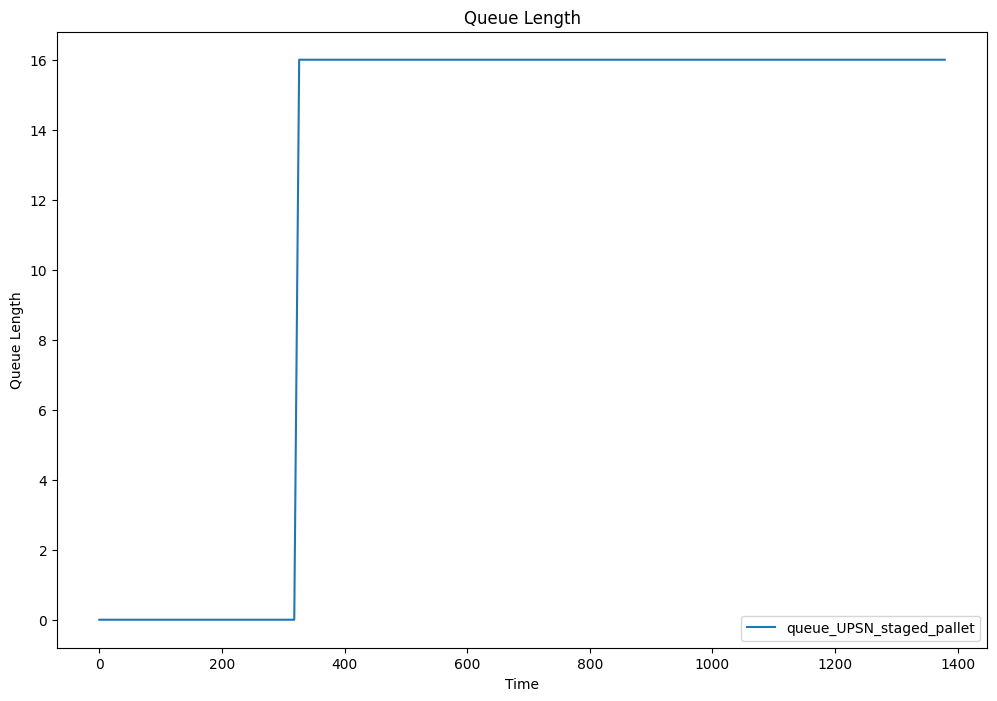

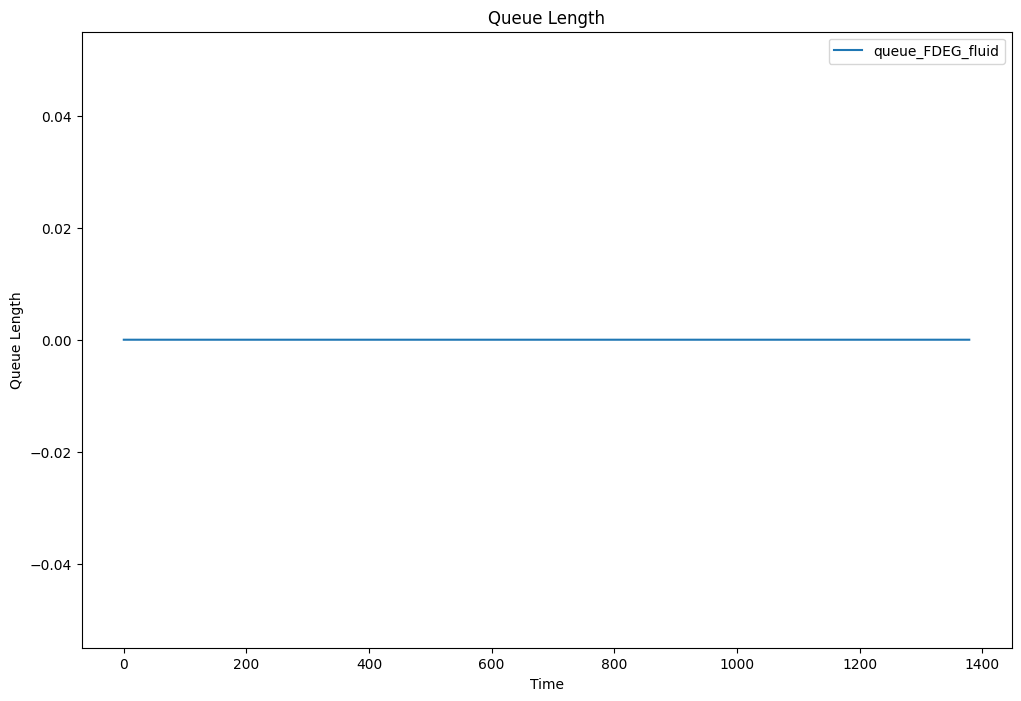

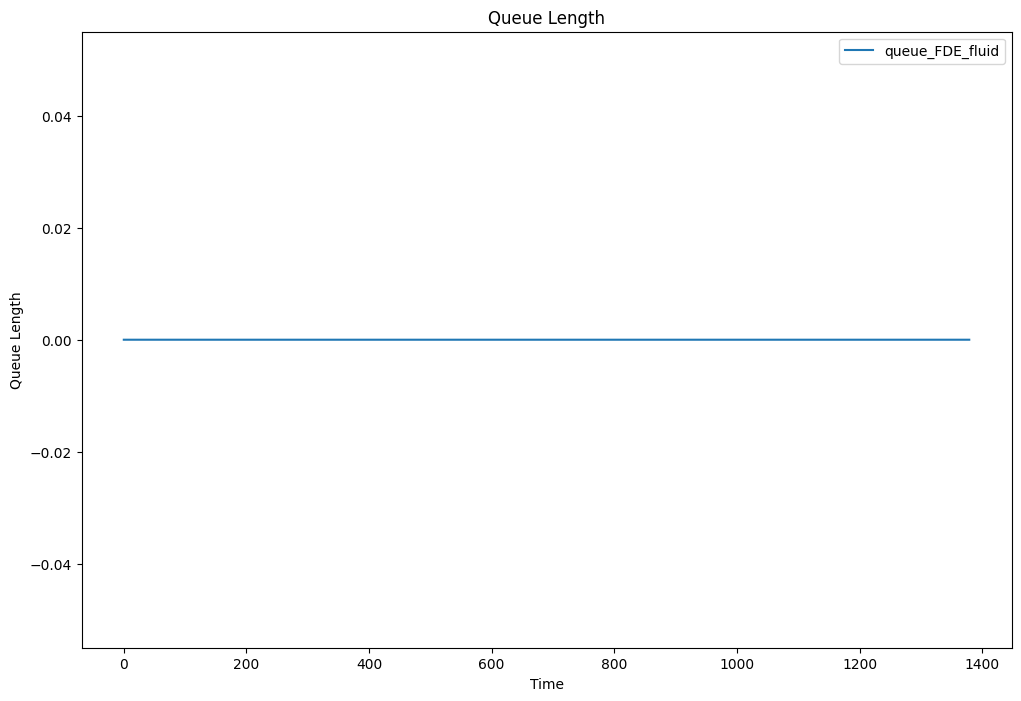

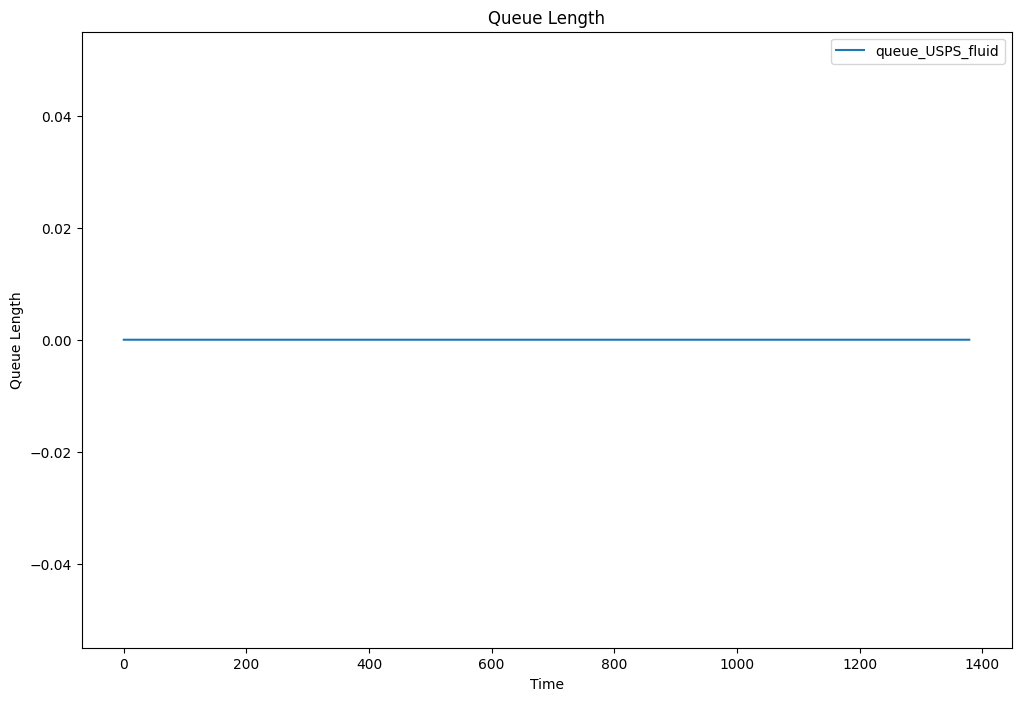

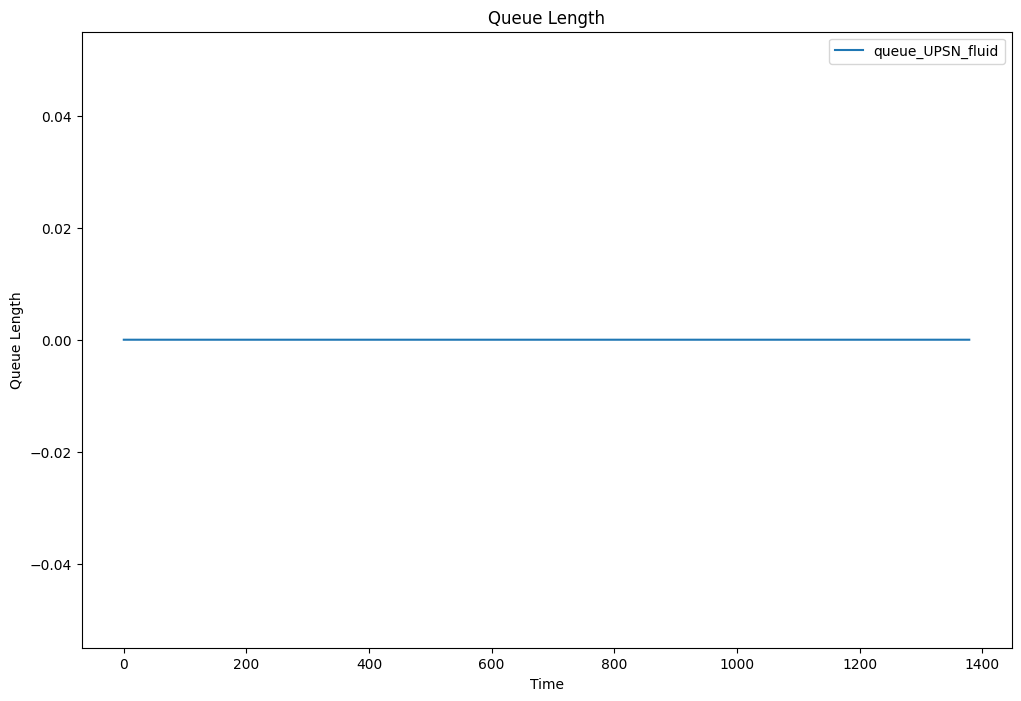

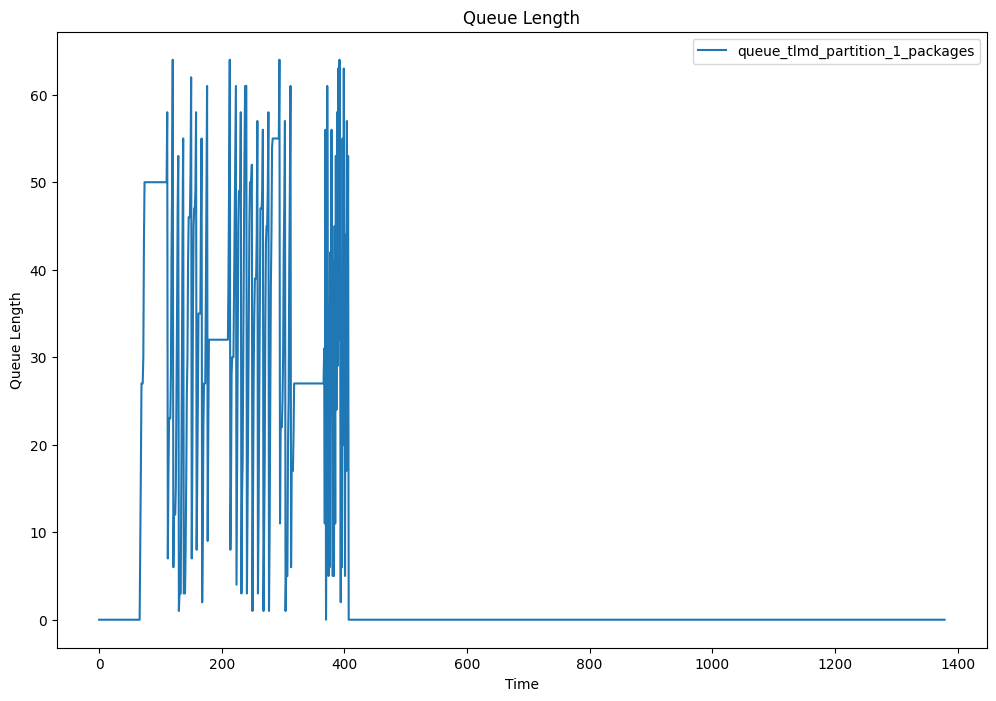

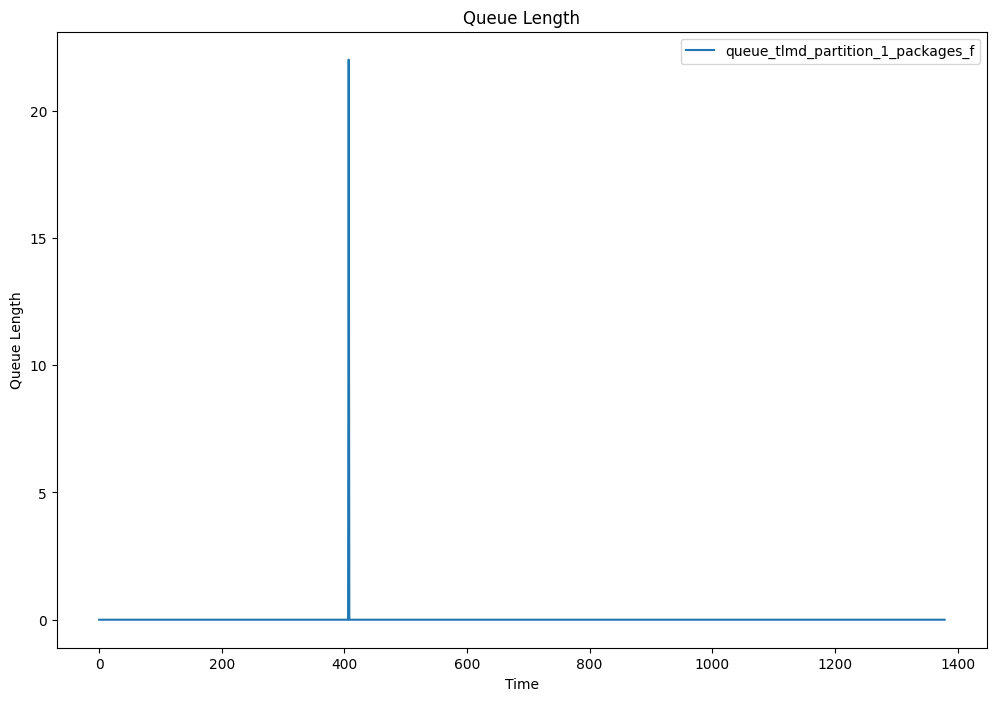

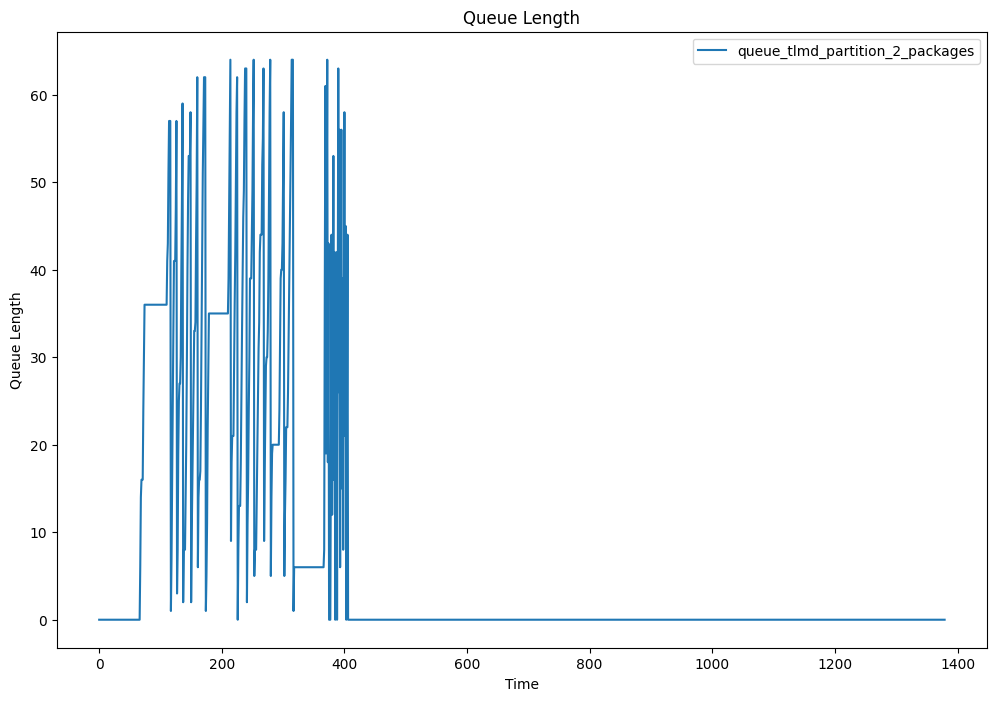

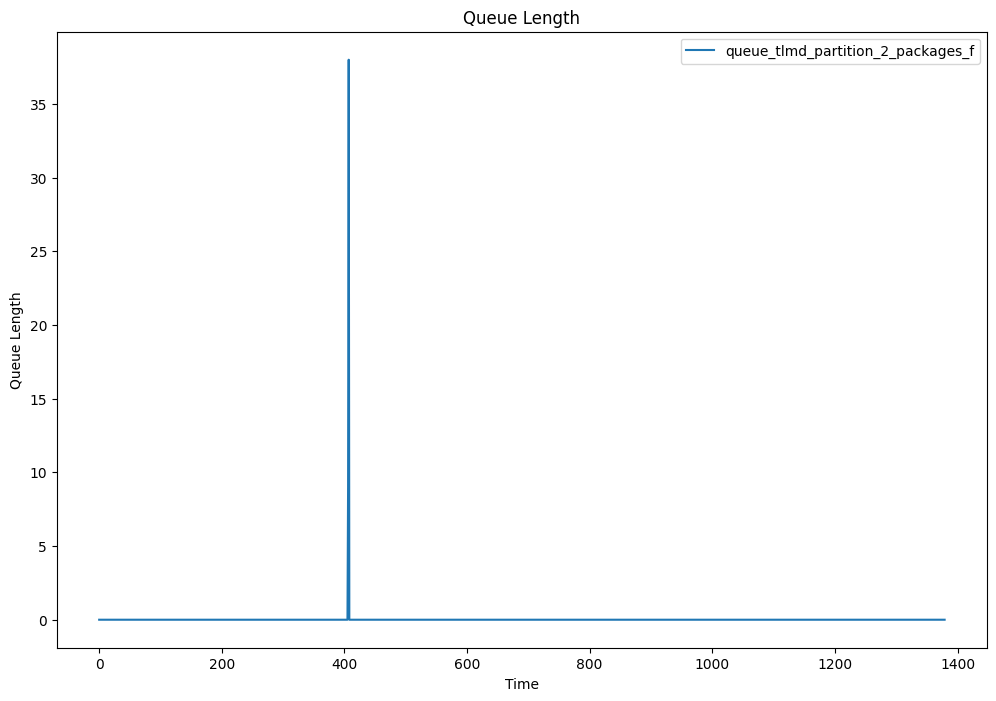

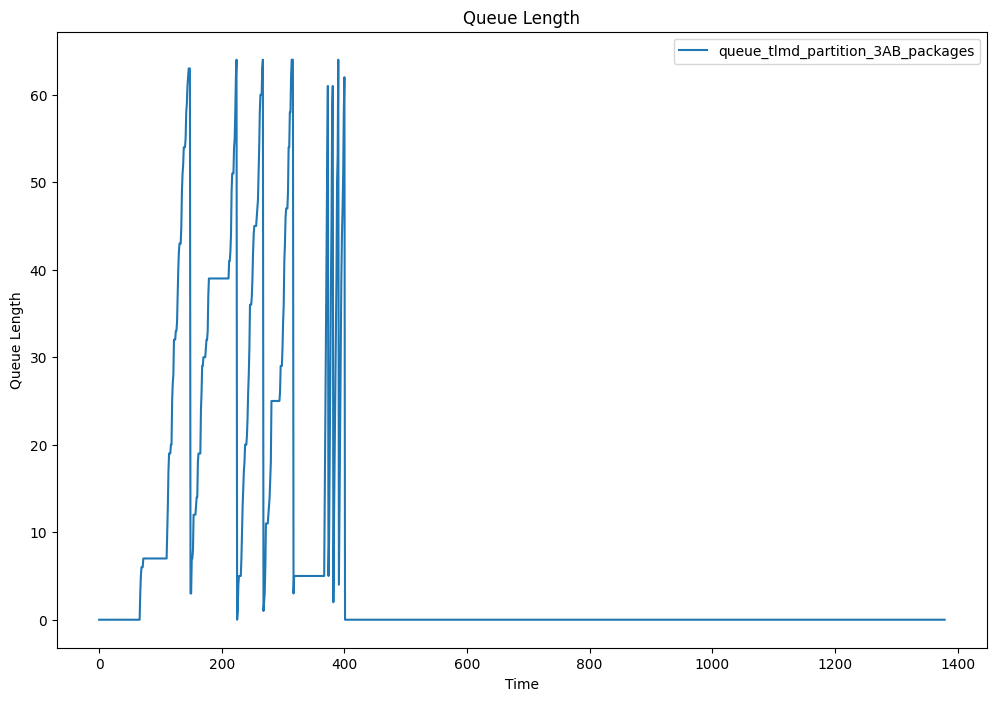

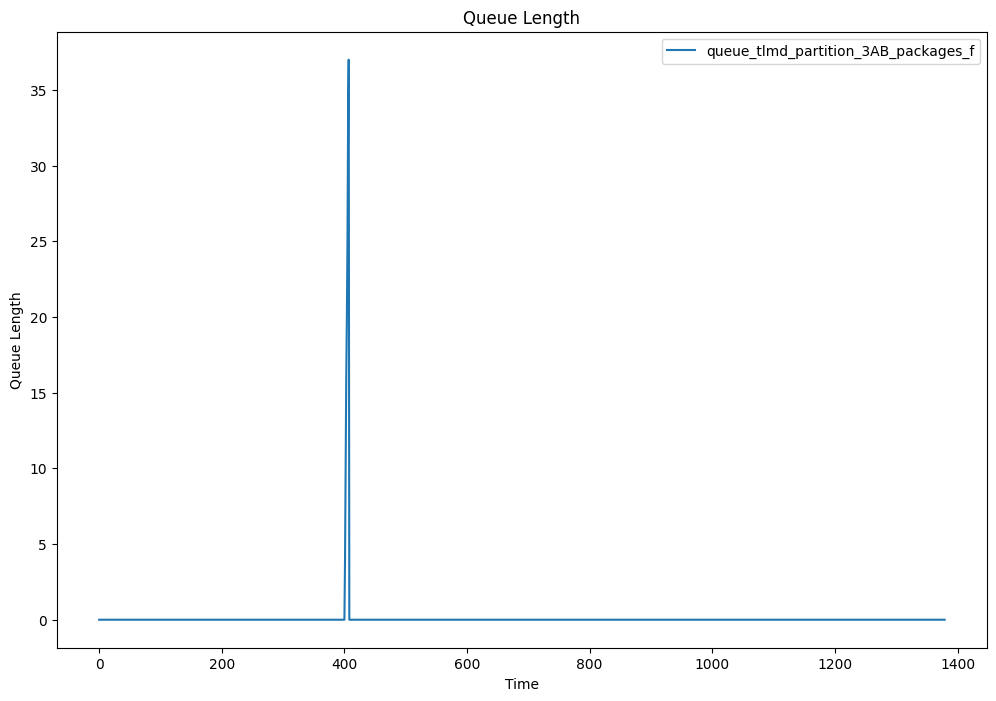

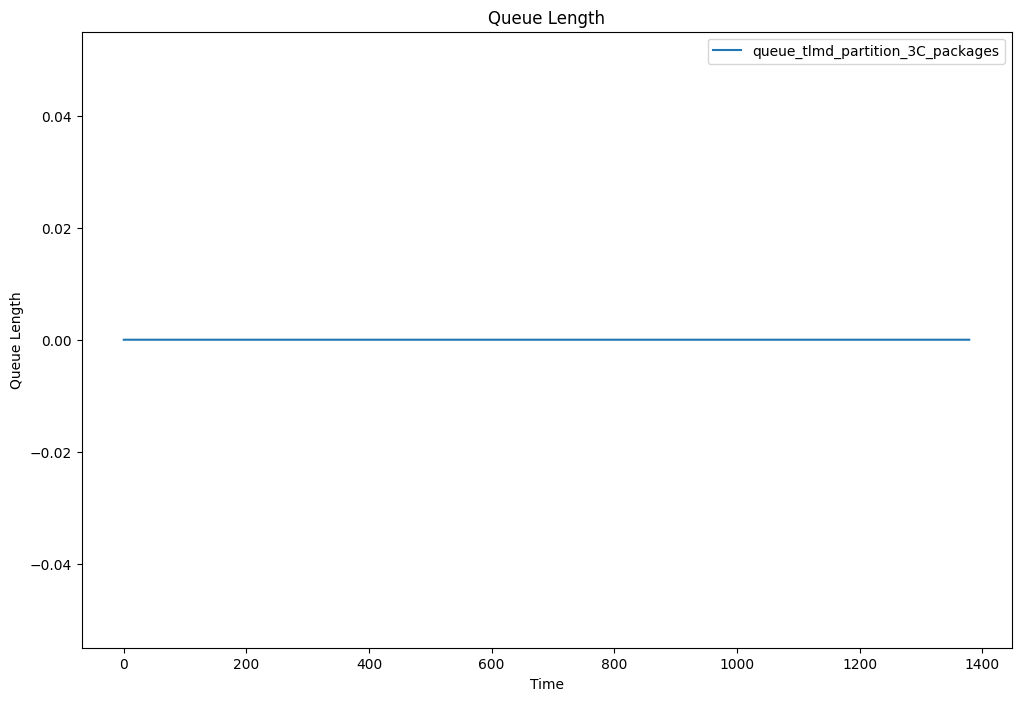

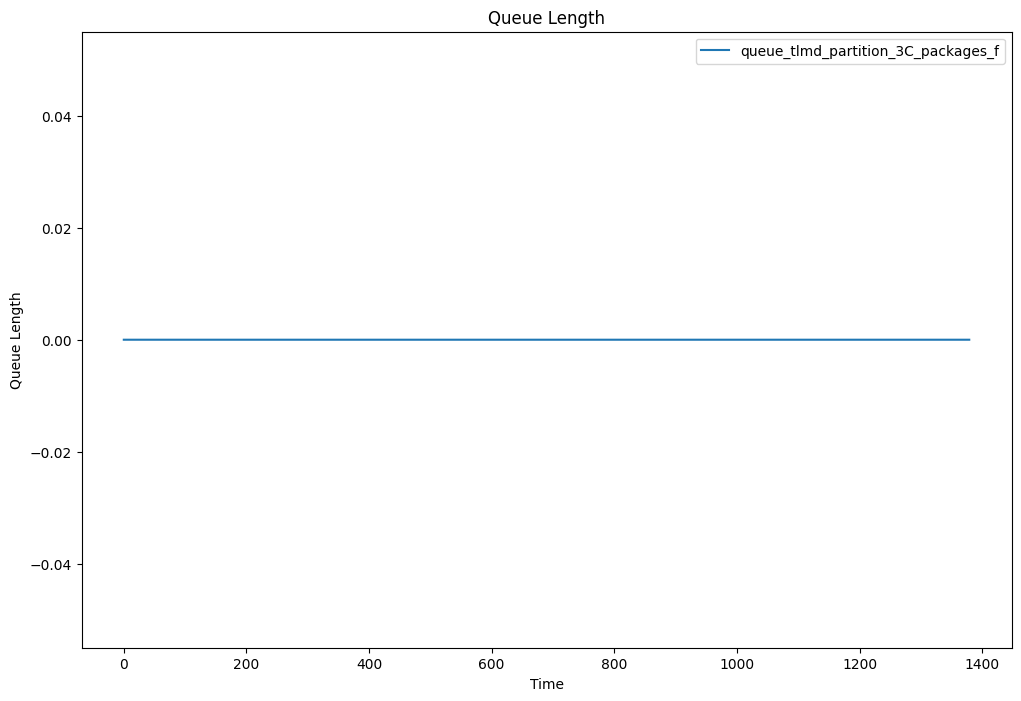

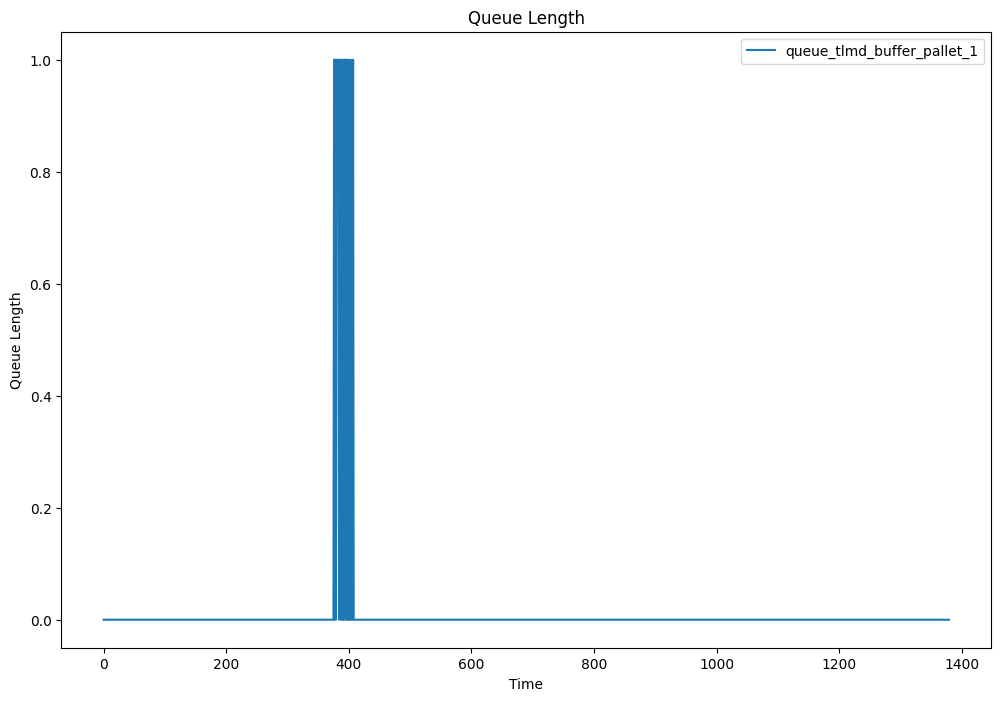

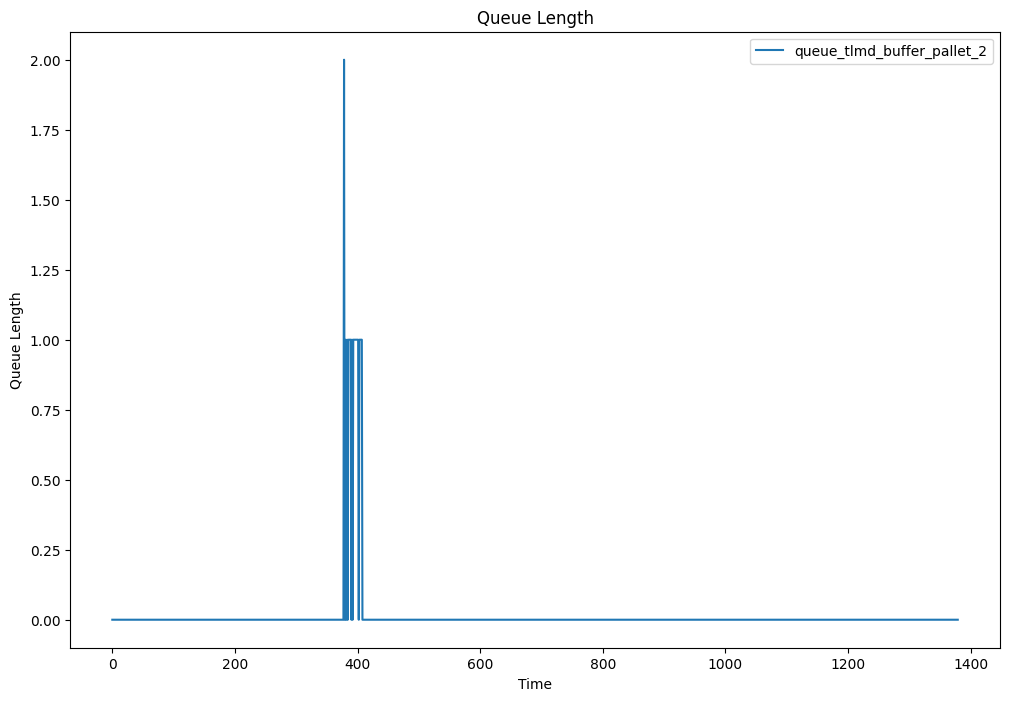

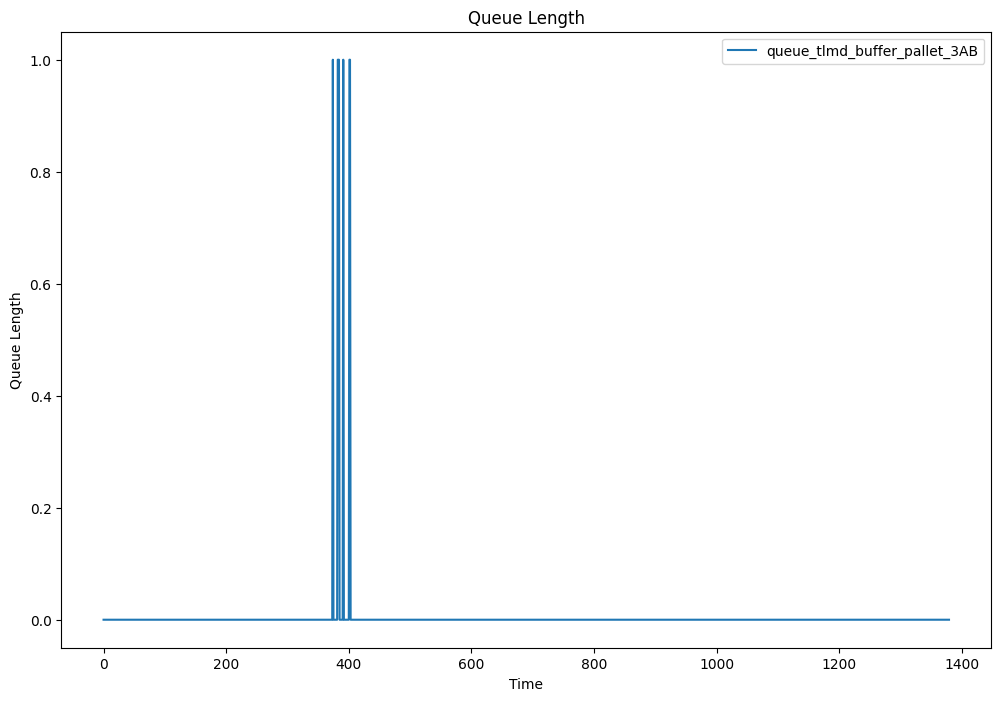

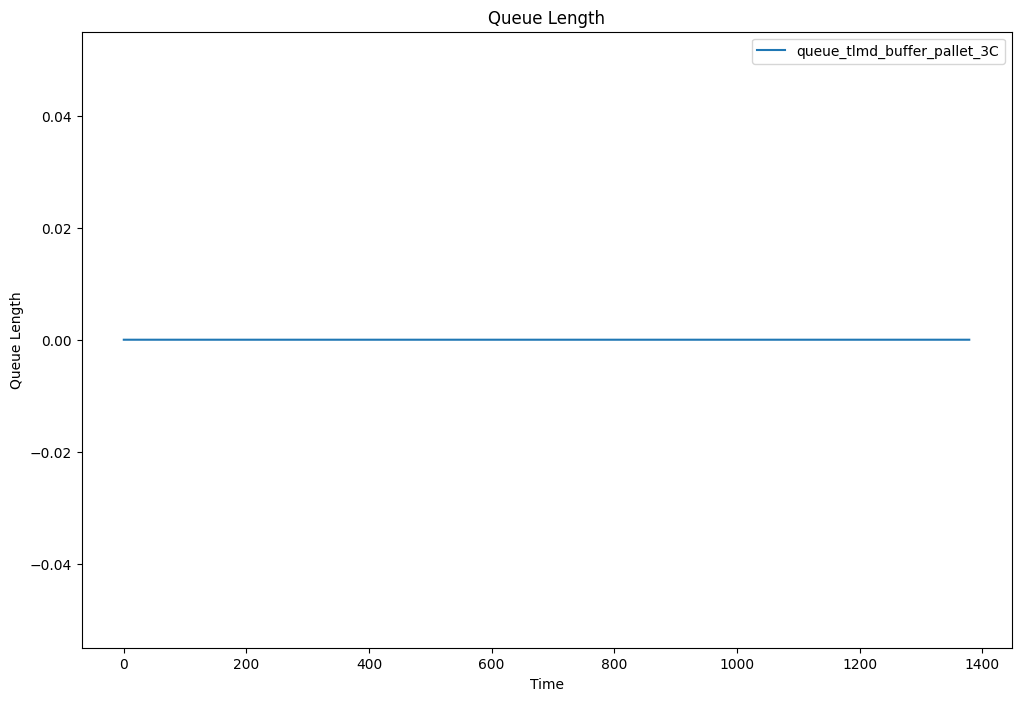

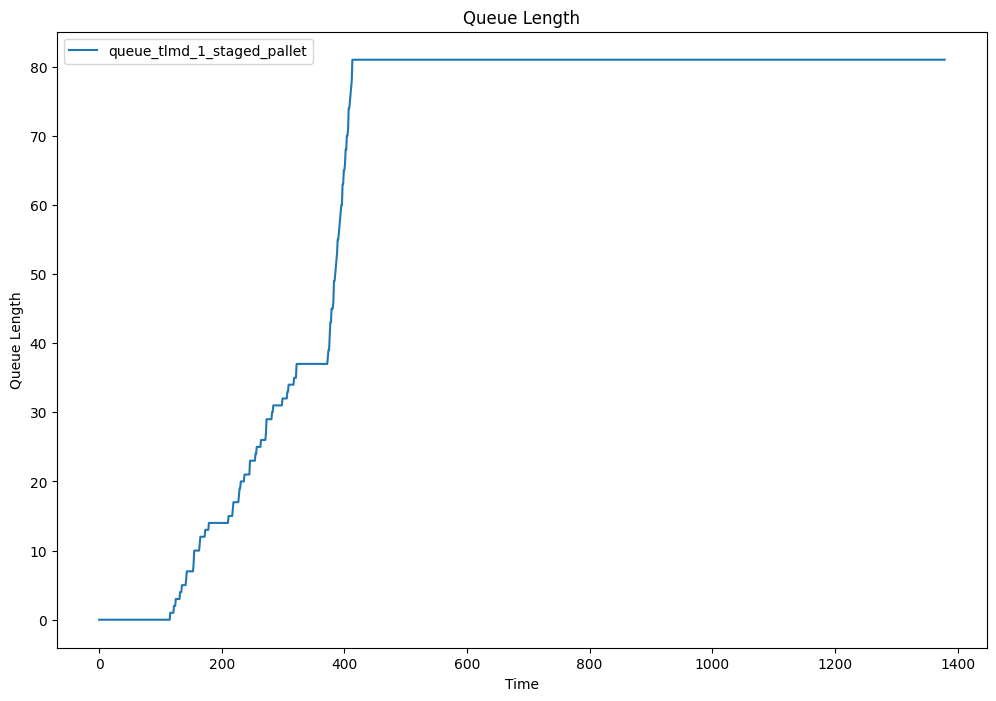

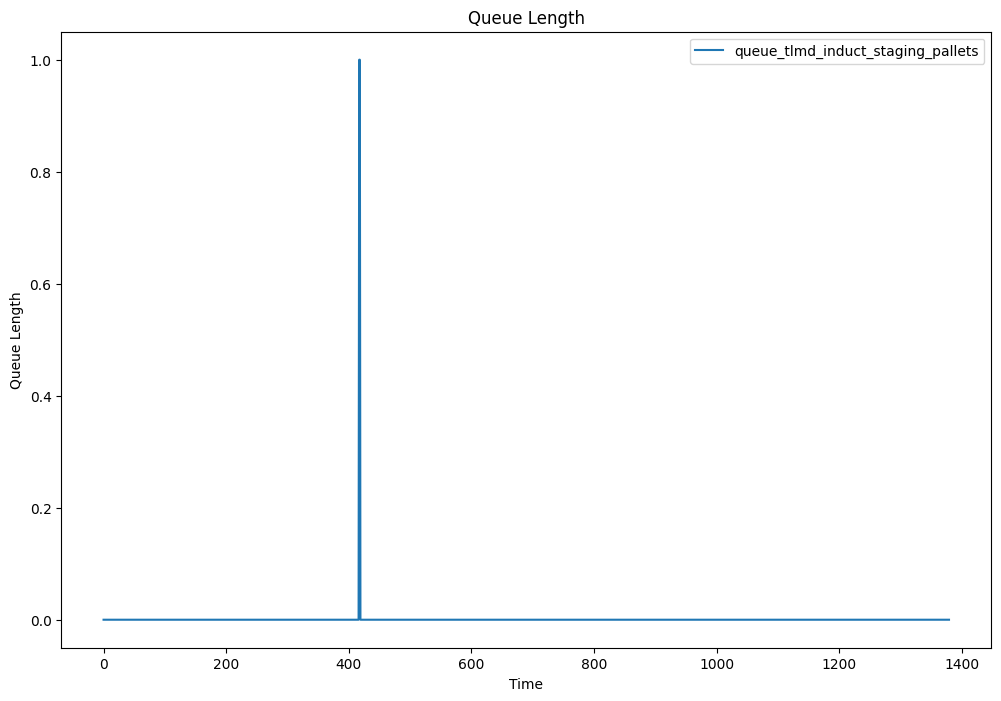

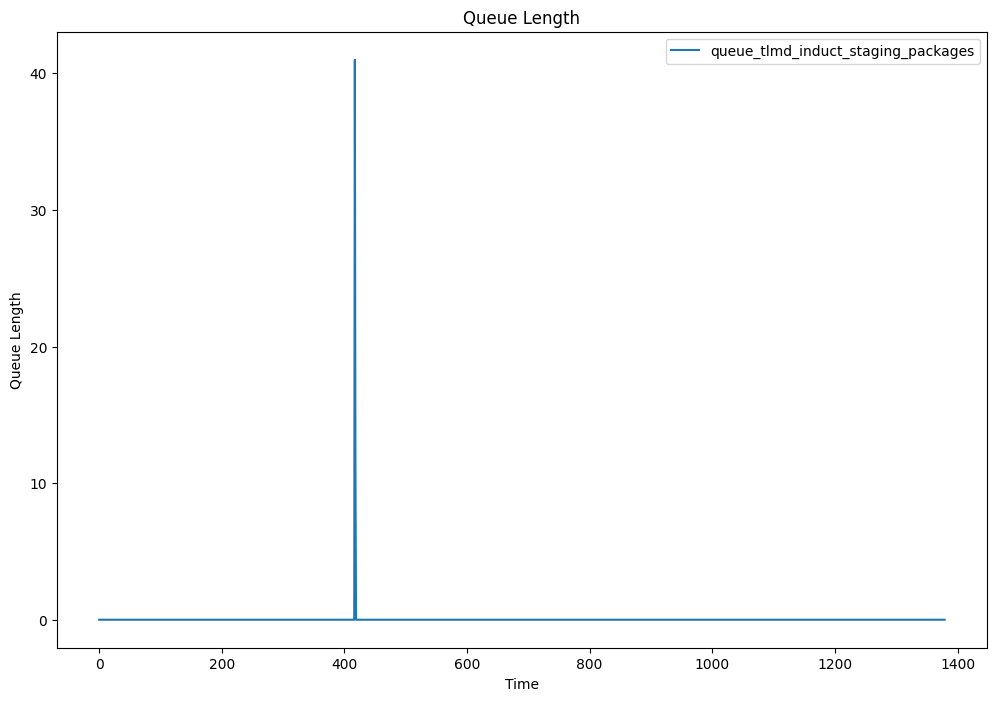

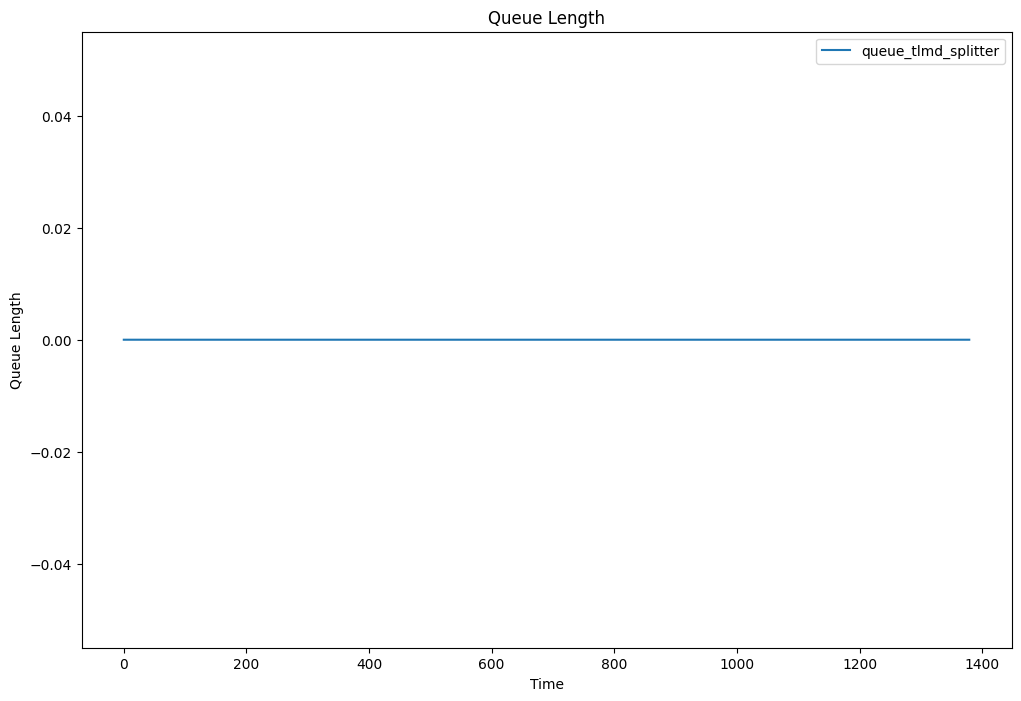

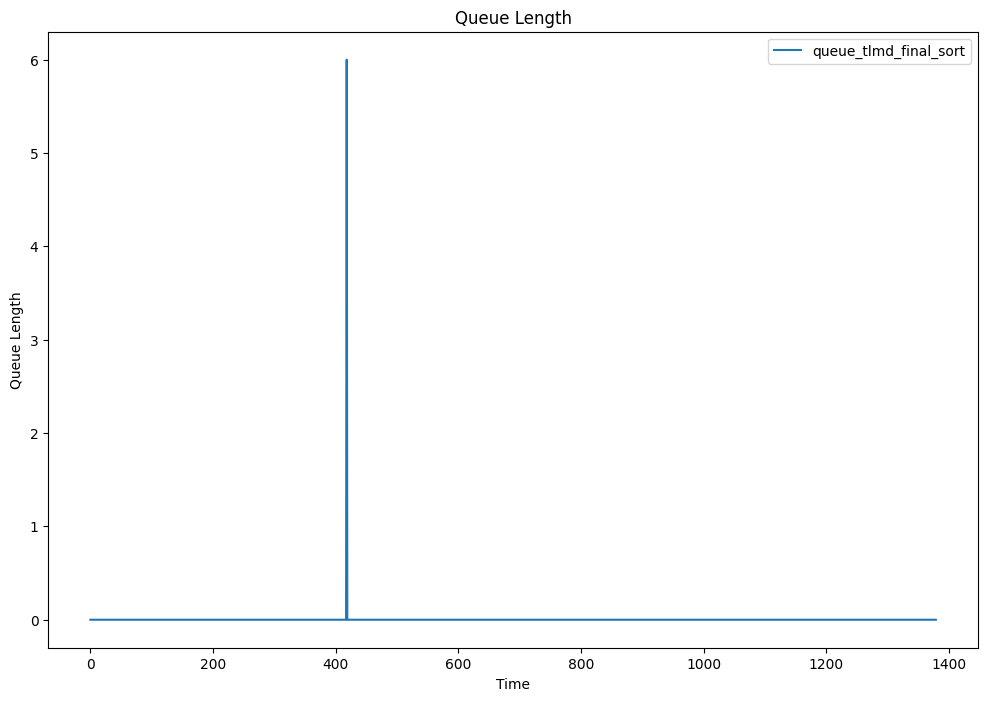

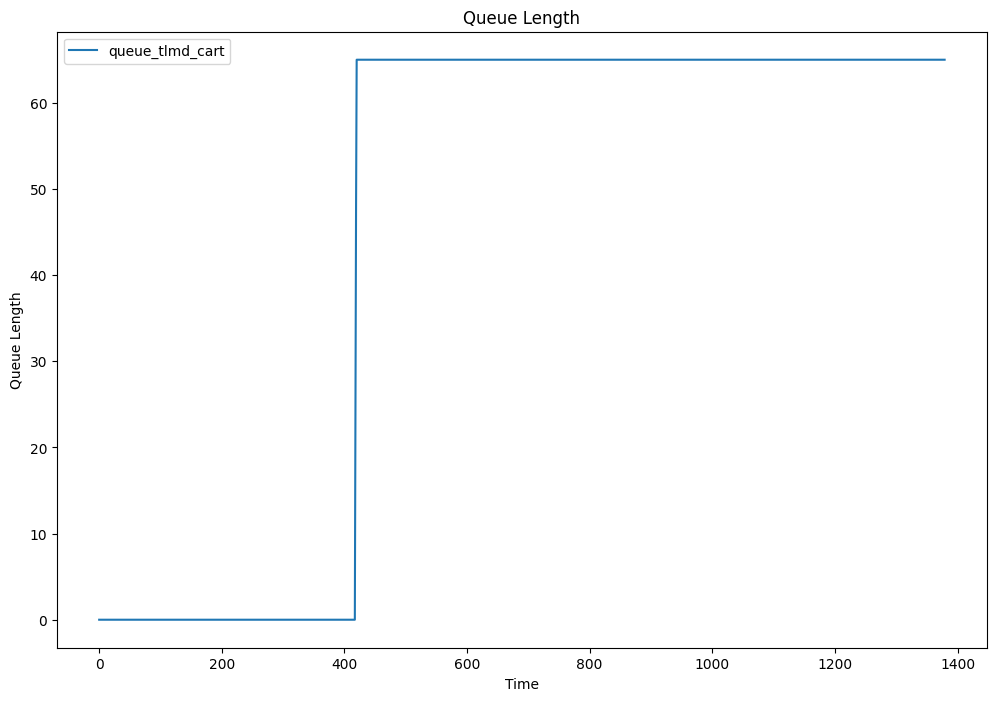

In [3]:
#Run this block to analyze the effects of process variability on the established set up of conditions based on current process set up.

results_tracker = {}
results_tracker_var_05 = {}
results_tracker_var_1 = {}
results_tracker_var_15 = {}
results_tracker_var_2 = {}
results_tracker_var_25 = {}
results_tracker_var_3 = {}
results_tracker_var_35 = {}
results_tracker_var_4 = {}

package_dist_dic = {}

TFC_tracker = {}



for i in range(0, iterations):
    print(f"Trial: {i}")
    results, results_var_05, results_var_1, results_var_15, results_var_2, results_var_25, results_var_3, results_var_35, results_var_4,  df_package_distribution, TFC_arrival_minutes  = CPS.Simulation_Machine(predict_vol,
                        night_total_tm,
                        day_total_tm,
                        night_tm_pit_unload, 
                            night_tm_pit_induct, 
                            night_tm_nonpit_split, 
                            night_tm_nonpit_NC, 
                            night_tm_nonpit_buffer,
                            night_tm_TLMD_induct,
                            night_tm_TLMD_induct_stage,
                            night_tm_TLMD_picker,
                            night_tm_TLMD_sort, 
                            night_tm_TLMD_stage,
                            day_tm_pit_unload,
                            day_tm_pit_induct,
                            day_tm_nonpit_split,
                            day_tm_nonpit_NC,
                            day_tm_nonpit_buffer,
                            day_tm_TLMD_induct,
                            day_tm_TLMD_induct_stage,
                            day_tm_TLMD_picker,
                            day_tm_TLMD_sort,
                            day_tm_TLMD_stage,
                            USPS_Fluid_Status,
                            UPSN_Fluid_Status,
                            FDEG_Fluid_Status,
                            FDE_Fluid_Status,
                            var_05,
                            var_10,
                            var_15,
                            var_20,
                            var_25,
                            var_30,
                            var_35,
                            var_40)
    
    results_tracker[i] = results
    results_tracker_var_05[i] = results_var_05
    results_tracker_var_1[i] = results_var_1
    results_tracker_var_15[i] = results_var_15
    results_tracker_var_2[i] = results_var_2
    results_tracker_var_25[i] = results_var_25
    results_tracker_var_3[i] = results_var_3
    results_tracker_var_35[i] = results_var_35
    results_tracker_var_4[i] = results_var_4



    package_dist_dic[i] = {
            "Truck_1_Arrival": df_package_distribution.iloc[0, 3],
            "Truck_2_Arrival": df_package_distribution.iloc[1, 3],
            "Truck_3_Arrival": df_package_distribution.iloc[2, 3],
            "Truck_4_Arrival": df_package_distribution.iloc[3, 3],
            "Truck_5_Arrival": df_package_distribution.iloc[4, 3],
            "Truck_6_Arrival": df_package_distribution.iloc[5, 3],
            "Truck_7_Arrival": df_package_distribution.iloc[6, 3],
            "Truck_8_Arrival": df_package_distribution.iloc[7, 3],
            "Truck_9_Arrival": df_package_distribution.iloc[8, 3],
            "Truck_10_Arrival": df_package_distribution.iloc[9, 3],
            "Truck_11_Arrival": df_package_distribution.iloc[10, 3],
            "Truck_12_Arrival": df_package_distribution.iloc[11, 3],
            "Truck_13_Arrival": df_package_distribution.iloc[12, 3],
            "Truck_14_Arrival": df_package_distribution.iloc[13, 3],
            "Truck_15_Arrival": df_package_distribution.iloc[14, 3],
            "Truck_1_Volume": df_package_distribution.iloc[0, 2],
            "Truck_2_Volume": df_package_distribution.iloc[1, 2],
            "Truck_3_Volume": df_package_distribution.iloc[2, 2],
            "Truck_4_Volume": df_package_distribution.iloc[3, 2],
            "Truck_5_Volume": df_package_distribution.iloc[4, 2],
            "Truck_6_Volume": df_package_distribution.iloc[5, 2],
            "Truck_7_Volume": df_package_distribution.iloc[6, 2],
            "Truck_8_Volume": df_package_distribution.iloc[7, 2],
            "Truck_9_Volume": df_package_distribution.iloc[8, 2],
            "Truck_10_Volume": df_package_distribution.iloc[9, 2],
            "Truck_11_Volume": df_package_distribution.iloc[10, 2],
            "Truck_12_Volume": df_package_distribution.iloc[11, 2],
            "Truck_13_Volume": df_package_distribution.iloc[12, 2],
            "Truck_14_Volume": df_package_distribution.iloc[13, 2],
            "Truck_15_Volume": df_package_distribution.iloc[14, 2],

    }


    
    TFC_tracker[i] = TFC_arrival_minutes

df = pd.DataFrame.from_dict(results_tracker, orient='index')

df_var_05 = pd.DataFrame.from_dict(results_tracker_var_05, orient='index')
df_var_1 = pd.DataFrame.from_dict(results_tracker_var_1, orient='index')
df_var_15 = pd.DataFrame.from_dict(results_tracker_var_15, orient='index')
df_var_2 = pd.DataFrame.from_dict(results_tracker_var_2, orient='index')
df_var_25 = pd.DataFrame.from_dict(results_tracker_var_25, orient='index')
df_var_3 = pd.DataFrame.from_dict(results_tracker_var_3, orient='index')
df_var_35 = pd.DataFrame.from_dict(results_tracker_var_35, orient='index')
df_var_4 = pd.DataFrame.from_dict(results_tracker_var_4, orient='index')
df_packages = pd.DataFrame.from_dict(package_dist_dic, orient='index')




# Display the DataFrame
df.to_csv('results_cur_pallet.csv')
if var_05:
    df_var_05.to_csv('results_var_05.csv')

if var_10:
    df_var_1.to_csv('results_var_10.csv')

if var_15:
    df_var_15.to_csv('results_var_15.csv')

if var_20:
    df_var_2.to_csv('results_var_20.csv')

if var_25:
    df_var_25.to_csv('results_var_25.csv')

if var_30:
    df_var_3.to_csv('results_var_30.csv')

if var_35:
    df_var_35.to_csv('results_var_35.csv')

if var_40:
    df_var_4.to_csv('results_var_40.csv')

    
df_packages.to_csv('package_distribution_cur_pallet.csv')

